In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00


(1797, 64)


<Figure size 640x480 with 0 Axes>

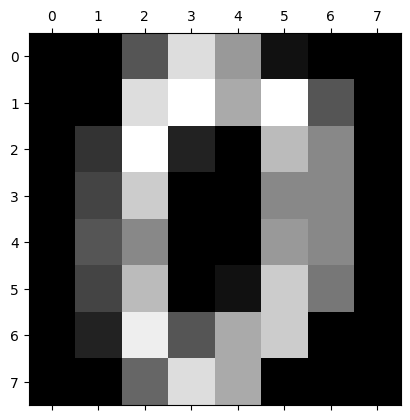

In [25]:

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

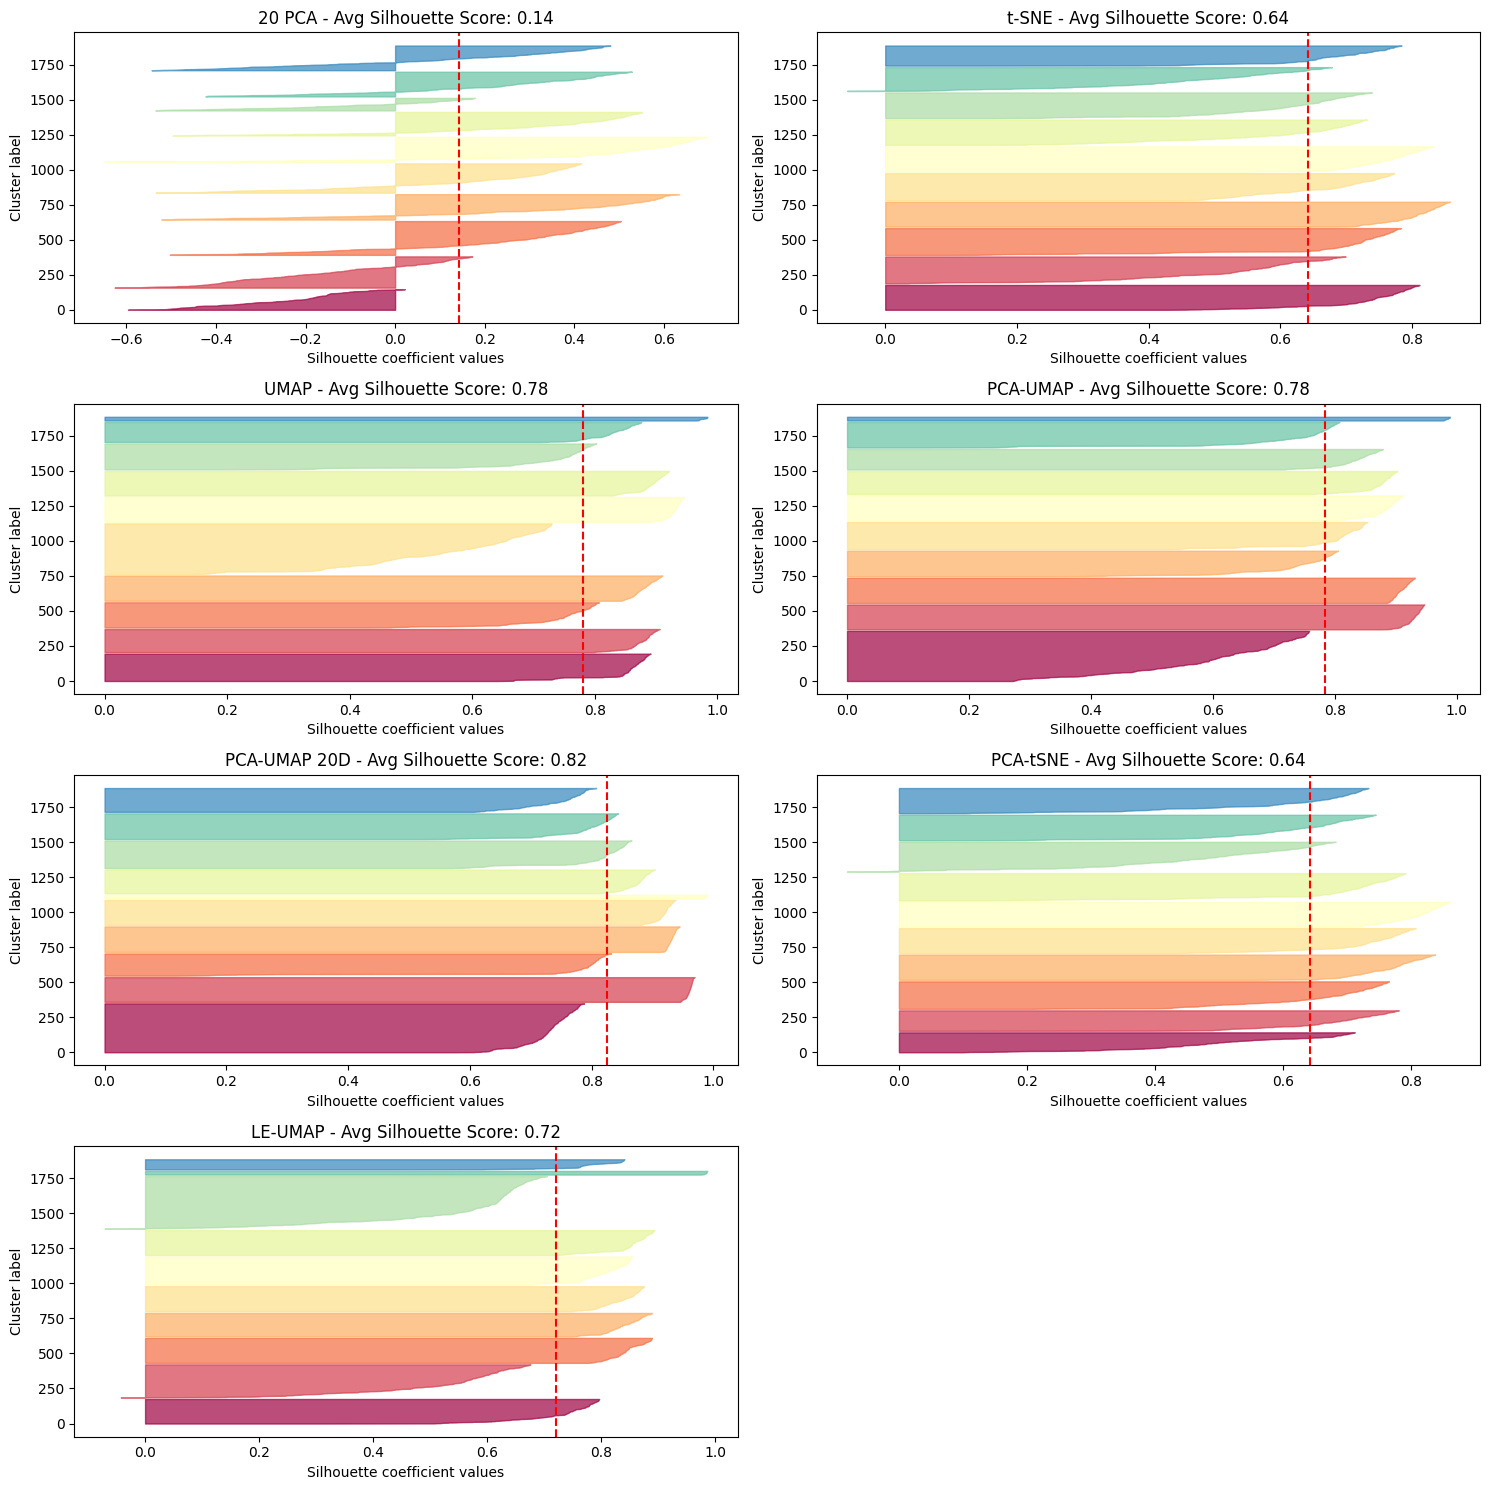

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from sklearn.manifold import SpectralEmbedding
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Cargar datos de DIGITD ATASET
digits = datasets.load_digits()
data = digits.data
labels = digits.target

# Normalizar datos
scaler = StandardScaler()
data_scaled = data#scaler.fit_transform(data)

# Aplicar reducciones de dimensionalidad y clustering
pca_result = PCA(n_components=20).fit_transform(data_scaled)
pca_clusters = KMeans(n_clusters=10).fit_predict(pca_result[:, :])  # Asumiendo que quieres visualizar en 2D

tsne_result = TSNE(n_components=2, random_state=42).fit_transform(data_scaled)
tsne_clusters = KMeans(n_clusters=10).fit_predict(tsne_result)

umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(data_scaled)
umap_clusters = KMeans(n_clusters=10).fit_predict(umap_result)

pca_umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(PCA(n_components=20).fit_transform(data_scaled))
pca_umap_clusters = KMeans(n_clusters=10).fit_predict(pca_umap_result)

# PCA-UMAP con 20 componentes
pca_umap_result_10 = umap.UMAP(n_components=20, random_state=42,n_epochs=1000,metric='cosine').fit_transform(pca_result)
pca_umap_clusters_10 = KMeans(n_clusters=10, random_state=42).fit_predict(pca_umap_result_10)

pca_tsne_result = TSNE(n_components=2, random_state=42).fit_transform(PCA(n_components=20).fit_transform(data_scaled))
pca_tsne_clusters = KMeans(n_clusters=10).fit_predict(pca_tsne_result)

le_umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(SpectralEmbedding(n_components=20).fit_transform(data_scaled))
le_umap_clusters = KMeans(n_clusters=10).fit_predict(le_umap_result)

# Configuración de la figura múltiple
fig, axs = plt.subplots(4, 2, figsize=(15, 15))  # Ajustado a 4x2 para todos los plots

# Función para plotear diagramas de silueta
def plot_silhouette_corrected(result, clusters, ax, title):
    silhouette_vals = silhouette_samples(result, clusters)
    y_lower, y_upper = 0, 0
    for j in range(10):
        cluster_silhouette_vals = silhouette_vals[clusters == j]
        cluster_silhouette_vals.sort()
        y_upper = y_lower + len(cluster_silhouette_vals)
        color = plt.cm.Spectral(j / 10)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10  # espacio para el siguiente cluster

    avg_score = silhouette_score(result, clusters)
    ax.axvline(x=avg_score, color="red", linestyle="--")
    ax.set_title(f'{title} - Avg Silhouette Score: {avg_score:.2f}')
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')

# Ploteo de los resultados
plot_silhouette_corrected(pca_result[:, :2], pca_clusters, axs[0, 0], '20 PCA')
plot_silhouette_corrected(tsne_result, tsne_clusters, axs[0, 1], 't-SNE')
plot_silhouette_corrected(umap_result, umap_clusters, axs[1, 0], 'UMAP')
plot_silhouette_corrected(pca_umap_result, pca_umap_clusters, axs[1, 1], 'PCA-UMAP')
plot_silhouette_corrected(pca_umap_result_10, pca_umap_clusters_10, axs[2, 0], 'PCA-UMAP 20D')
plot_silhouette_corrected(pca_tsne_result, pca_tsne_clusters, axs[2, 1], 'PCA-tSNE')
plot_silhouette_corrected(le_umap_result, le_umap_clusters, axs[3, 0], 'LE-UMAP')
axs[3, 1].axis('off')  # Desactivar el eje adicional si no se usa

plt.tight_layout()
plt.show()
